# Imports and column Drops 

In [1]:
#Imports for data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load in file 
df = pd.read_csv('./data/train.csv',low_memory=False)

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
#Drop unnecessary Columns
df.drop(['ID','Name','SSN','Customer_ID','Changed_Credit_Limit','Occupation','Total_EMI_per_month','Payment_Behaviour','Type_of_Loan'],inplace=True, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                100000 non-null  object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

# Changing column types, removing special characters, removing outliers

In [7]:
df['Month'].value_counts()

January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: Month, dtype: int64

In [8]:
#Get rid of underscores characters in Age
df['Age'] = df.Age.str.replace('_','')

In [9]:
#Change age type to a float
df['Age'] = df.Age.astype(float)

In [10]:
df.Age.value_counts()

38.0      2994
28.0      2968
31.0      2955
26.0      2945
32.0      2884
          ... 
1908.0       1
4583.0       1
7549.0       1
3119.0       1
1342.0       1
Name: Age, Length: 1728, dtype: int64

<AxesSubplot:xlabel='Age'>

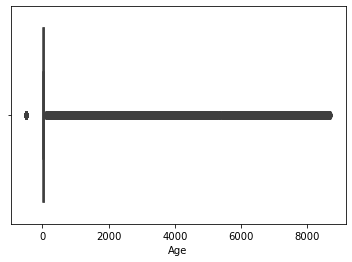

In [11]:
sns.boxplot(df['Age'])

In [12]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [13]:
#Filter out extreme age outliers
df = df.loc[(df['Age'] > lower_limit) & (df['Age'] < upper_limit)]

<AxesSubplot:xlabel='Age'>

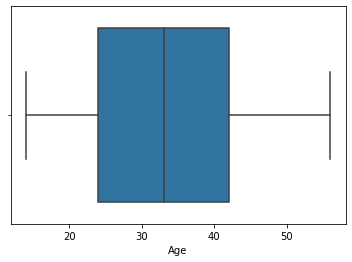

In [14]:
#visual to see if outliers have been filtered

sns.boxplot(df['Age'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97219 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97219 non-null  object 
 1   Age                       97219 non-null  float64
 2   Annual_Income             97219 non-null  object 
 3   Monthly_Inhand_Salary     82623 non-null  float64
 4   Num_Bank_Accounts         97219 non-null  int64  
 5   Num_Credit_Card           97219 non-null  int64  
 6   Interest_Rate             97219 non-null  int64  
 7   Num_of_Loan               97219 non-null  object 
 8   Delay_from_due_date       97219 non-null  int64  
 9   Num_of_Delayed_Payment    90395 non-null  object 
 10  Num_Credit_Inquiries      95313 non-null  float64
 11  Credit_Mix                97219 non-null  object 
 12  Outstanding_Debt          97219 non-null  object 
 13  Credit_Utilization_Ratio  97219 non-null  float64
 14  Credit

In [16]:
#Get rid of underscores
df['Annual_Income'] = df.Annual_Income.str.replace('_','')

In [17]:
#Change type to a float 
df['Annual_Income'] = df.Annual_Income.astype(float)

<AxesSubplot:xlabel='Annual_Income'>

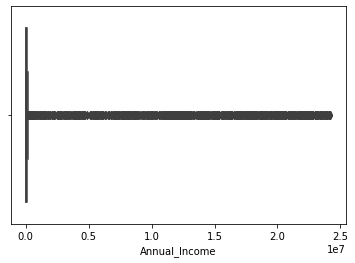

In [18]:
#Before filter boxplot
sns.boxplot(df['Annual_Income'])

In [19]:
percentile25 = df['Annual_Income'].quantile(0.25)
percentile75 = df['Annual_Income'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [20]:
#Filter out annual income extreme outliers
df = df.loc[(df['Annual_Income'] > lower_limit) & (df['Annual_Income'] < upper_limit)]

<AxesSubplot:xlabel='Annual_Income'>

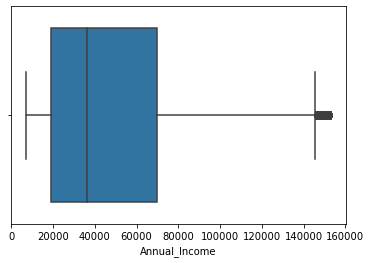

In [21]:
#After filter boxplot
sns.boxplot(df['Annual_Income'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94520 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     94520 non-null  object 
 1   Age                       94520 non-null  float64
 2   Annual_Income             94520 non-null  float64
 3   Monthly_Inhand_Salary     80354 non-null  float64
 4   Num_Bank_Accounts         94520 non-null  int64  
 5   Num_Credit_Card           94520 non-null  int64  
 6   Interest_Rate             94520 non-null  int64  
 7   Num_of_Loan               94520 non-null  object 
 8   Delay_from_due_date       94520 non-null  int64  
 9   Num_of_Delayed_Payment    87887 non-null  object 
 10  Num_Credit_Inquiries      92665 non-null  float64
 11  Credit_Mix                94520 non-null  object 
 12  Outstanding_Debt          94520 non-null  object 
 13  Credit_Utilization_Ratio  94520 non-null  float64
 14  Credit

In [23]:
df.Monthly_Inhand_Salary.value_counts()

6082.187500     15
6769.130000     15
2295.058333     15
3080.555000     14
5766.491667     13
                ..
10018.500000     1
7545.800911      1
6450.393333      1
3102.778454      1
3304.807427      1
Name: Monthly_Inhand_Salary, Length: 12990, dtype: int64

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

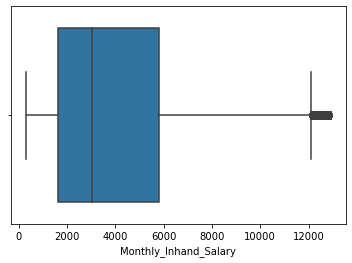

In [24]:
#Before filter boxplot
sns.boxplot(df['Monthly_Inhand_Salary'])

In [25]:
percentile25 = df['Monthly_Inhand_Salary'].quantile(0.25)
percentile75 = df['Monthly_Inhand_Salary'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [26]:
df = df.loc[(df['Monthly_Inhand_Salary'] > lower_limit) & (df['Monthly_Inhand_Salary'] < upper_limit)]

<AxesSubplot:xlabel='Monthly_Inhand_Salary'>

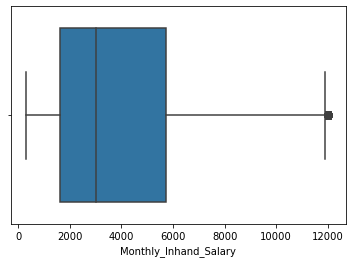

In [27]:
#after filter boxplot
sns.boxplot(df['Monthly_Inhand_Salary'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79765 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     79765 non-null  object 
 1   Age                       79765 non-null  float64
 2   Annual_Income             79765 non-null  float64
 3   Monthly_Inhand_Salary     79765 non-null  float64
 4   Num_Bank_Accounts         79765 non-null  int64  
 5   Num_Credit_Card           79765 non-null  int64  
 6   Interest_Rate             79765 non-null  int64  
 7   Num_of_Loan               79765 non-null  object 
 8   Delay_from_due_date       79765 non-null  int64  
 9   Num_of_Delayed_Payment    74149 non-null  object 
 10  Num_Credit_Inquiries      78186 non-null  float64
 11  Credit_Mix                79765 non-null  object 
 12  Outstanding_Debt          79765 non-null  object 
 13  Credit_Utilization_Ratio  79765 non-null  float64
 14  Credit

In [29]:
df.Num_Bank_Accounts.value_counts()

6       10672
7       10518
8       10408
4        9621
5        9565
        ...  
583         1
374         1
1695        1
274         1
697         1
Name: Num_Bank_Accounts, Length: 808, dtype: int64

<AxesSubplot:xlabel='Num_Bank_Accounts'>

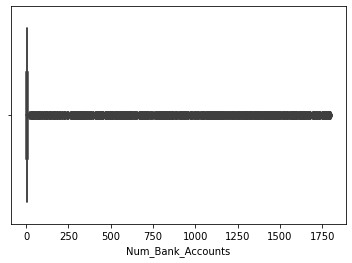

In [30]:
sns.boxplot(df['Num_Bank_Accounts'])

In [31]:
percentile25 = df['Num_Bank_Accounts'].quantile(0.25)
percentile75 = df['Num_Bank_Accounts'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [32]:
df = df.loc[(df['Num_Bank_Accounts'] > 0) & (df['Num_Bank_Accounts'] < upper_limit)]

<AxesSubplot:xlabel='Num_Bank_Accounts'>

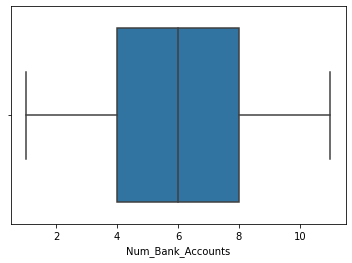

In [33]:
sns.boxplot(df['Num_Bank_Accounts'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75418 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     75418 non-null  object 
 1   Age                       75418 non-null  float64
 2   Annual_Income             75418 non-null  float64
 3   Monthly_Inhand_Salary     75418 non-null  float64
 4   Num_Bank_Accounts         75418 non-null  int64  
 5   Num_Credit_Card           75418 non-null  int64  
 6   Interest_Rate             75418 non-null  int64  
 7   Num_of_Loan               75418 non-null  object 
 8   Delay_from_due_date       75418 non-null  int64  
 9   Num_of_Delayed_Payment    70138 non-null  object 
 10  Num_Credit_Inquiries      73920 non-null  float64
 11  Credit_Mix                75418 non-null  object 
 12  Outstanding_Debt          75418 non-null  object 
 13  Credit_Utilization_Ratio  75418 non-null  float64
 14  Credit

In [35]:
df.Num_Credit_Card.value_counts()

5       13689
6       12820
7       12730
4       10334
3        9725
        ...  
175         1
693         1
1114        1
360         1
679         1
Name: Num_Credit_Card, Length: 1042, dtype: int64

<AxesSubplot:xlabel='Num_Credit_Card'>

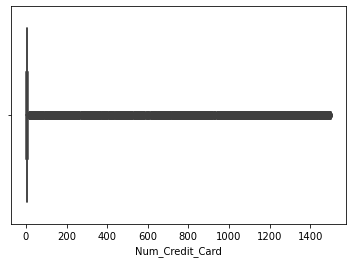

In [36]:
sns.boxplot(df['Num_Credit_Card'])

In [37]:
percentile25 = df['Num_Credit_Card'].quantile(0.25)
percentile75 = df['Num_Credit_Card'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [38]:
df = df.loc[(df['Num_Credit_Card'] > lower_limit) & (df['Num_Credit_Card'] < upper_limit)]

<AxesSubplot:xlabel='Num_Credit_Card'>

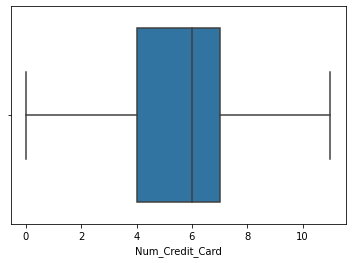

In [39]:
sns.boxplot(df['Num_Credit_Card'])

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73695 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     73695 non-null  object 
 1   Age                       73695 non-null  float64
 2   Annual_Income             73695 non-null  float64
 3   Monthly_Inhand_Salary     73695 non-null  float64
 4   Num_Bank_Accounts         73695 non-null  int64  
 5   Num_Credit_Card           73695 non-null  int64  
 6   Interest_Rate             73695 non-null  int64  
 7   Num_of_Loan               73695 non-null  object 
 8   Delay_from_due_date       73695 non-null  int64  
 9   Num_of_Delayed_Payment    68535 non-null  object 
 10  Num_Credit_Inquiries      72233 non-null  float64
 11  Credit_Mix                73695 non-null  object 
 12  Outstanding_Debt          73695 non-null  object 
 13  Credit_Utilization_Ratio  73695 non-null  float64
 14  Credit

In [41]:
df.Interest_Rate.value_counts()

8       3487
5       3458
6       3276
18      3254
15      3189
        ... 
967        1
3790       1
3782       1
4337       1
5729       1
Name: Interest_Rate, Length: 1354, dtype: int64

<AxesSubplot:xlabel='Interest_Rate'>

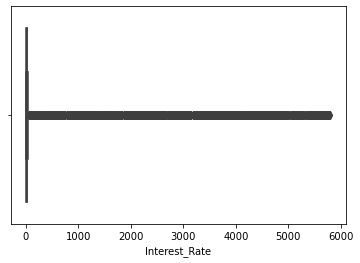

In [42]:
sns.boxplot(df['Interest_Rate'])

In [43]:
percentile25 = df['Interest_Rate'].quantile(0.25)
percentile75 = df['Interest_Rate'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [44]:
df = df.loc[(df['Interest_Rate'] > lower_limit) & (df['Interest_Rate'] < upper_limit)]

<AxesSubplot:xlabel='Interest_Rate'>

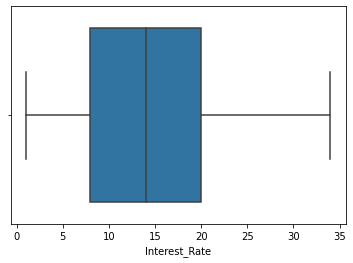

In [45]:
sns.boxplot(df['Interest_Rate'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72187 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     72187 non-null  object 
 1   Age                       72187 non-null  float64
 2   Annual_Income             72187 non-null  float64
 3   Monthly_Inhand_Salary     72187 non-null  float64
 4   Num_Bank_Accounts         72187 non-null  int64  
 5   Num_Credit_Card           72187 non-null  int64  
 6   Interest_Rate             72187 non-null  int64  
 7   Num_of_Loan               72187 non-null  object 
 8   Delay_from_due_date       72187 non-null  int64  
 9   Num_of_Delayed_Payment    67122 non-null  object 
 10  Num_Credit_Inquiries      70756 non-null  float64
 11  Credit_Mix                72187 non-null  object 
 12  Outstanding_Debt          72187 non-null  object 
 13  Credit_Utilization_Ratio  72187 non-null  float64
 14  Credit

In [47]:
df['Num_of_Loan'] = df.Num_of_Loan.str.replace('_','')

In [48]:
df['Num_of_Loan'] = df.Num_of_Loan.astype(float)

<AxesSubplot:xlabel='Num_of_Loan'>

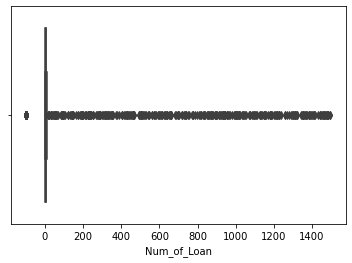

In [49]:
sns.boxplot(df['Num_of_Loan'])

In [50]:
percentile25 = df['Num_of_Loan'].quantile(0.25)
percentile75 = df['Num_of_Loan'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [51]:
df = df.loc[(df['Num_of_Loan'] > lower_limit) & (df['Num_of_Loan'] < upper_limit)]

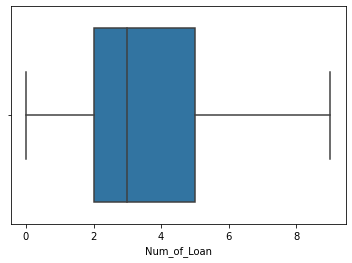

In [52]:
sns.boxplot(df['Num_of_Loan']);

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69046 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     69046 non-null  object 
 1   Age                       69046 non-null  float64
 2   Annual_Income             69046 non-null  float64
 3   Monthly_Inhand_Salary     69046 non-null  float64
 4   Num_Bank_Accounts         69046 non-null  int64  
 5   Num_Credit_Card           69046 non-null  int64  
 6   Interest_Rate             69046 non-null  int64  
 7   Num_of_Loan               69046 non-null  float64
 8   Delay_from_due_date       69046 non-null  int64  
 9   Num_of_Delayed_Payment    64214 non-null  object 
 10  Num_Credit_Inquiries      67676 non-null  float64
 11  Credit_Mix                69046 non-null  object 
 12  Outstanding_Debt          69046 non-null  object 
 13  Credit_Utilization_Ratio  69046 non-null  float64
 14  Credit

In [54]:
df['Delay_from_due_date'].value_counts()

 15    2424
 13    2260
 8     2213
 14    2186
 10    2135
       ... 
 64      43
-4       29
 66      22
-5       20
 67      15
Name: Delay_from_due_date, Length: 73, dtype: int64

<AxesSubplot:xlabel='Delay_from_due_date'>

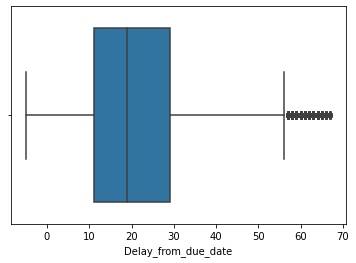

In [55]:
sns.boxplot(df['Delay_from_due_date'])

In [56]:
percentile25 = df['Delay_from_due_date'].quantile(0.25)
percentile75 = df['Delay_from_due_date'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [57]:
df = df.loc[(df['Delay_from_due_date'] > 0) & (df['Delay_from_due_date'] < upper_limit)]

<AxesSubplot:xlabel='Delay_from_due_date'>

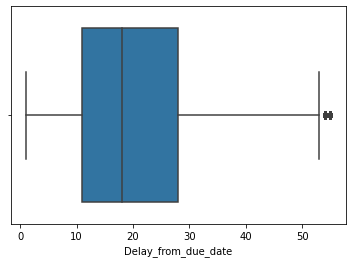

In [58]:
sns.boxplot(df['Delay_from_due_date'])

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65035 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     65035 non-null  object 
 1   Age                       65035 non-null  float64
 2   Annual_Income             65035 non-null  float64
 3   Monthly_Inhand_Salary     65035 non-null  float64
 4   Num_Bank_Accounts         65035 non-null  int64  
 5   Num_Credit_Card           65035 non-null  int64  
 6   Interest_Rate             65035 non-null  int64  
 7   Num_of_Loan               65035 non-null  float64
 8   Delay_from_due_date       65035 non-null  int64  
 9   Num_of_Delayed_Payment    60486 non-null  object 
 10  Num_Credit_Inquiries      63746 non-null  float64
 11  Credit_Mix                65035 non-null  object 
 12  Outstanding_Debt          65035 non-null  object 
 13  Credit_Utilization_Ratio  65035 non-null  float64
 14  Credit

In [60]:
df['Num_of_Delayed_Payment'].value_counts()

17      3707
19      3625
16      3573
15      3513
18      3493
        ... 
1673       1
4024       1
52         1
742        1
221        1
Name: Num_of_Delayed_Payment, Length: 511, dtype: int64

In [61]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.str.replace('_','')

In [62]:
df['Num_of_Delayed_Payment'] = df.Num_of_Delayed_Payment.astype(float)

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

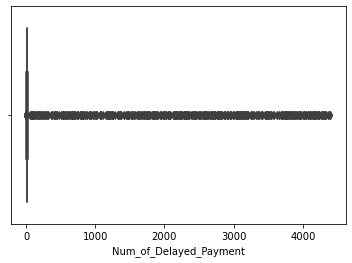

In [63]:
sns.boxplot(df['Num_of_Delayed_Payment'])

In [64]:
percentile25 = df['Num_of_Delayed_Payment'].quantile(0.25)
percentile75 = df['Num_of_Delayed_Payment'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [65]:
df = df.loc[(df['Num_of_Delayed_Payment'] > lower_limit) & (df['Num_of_Delayed_Payment'] < upper_limit)]

<AxesSubplot:xlabel='Num_of_Delayed_Payment'>

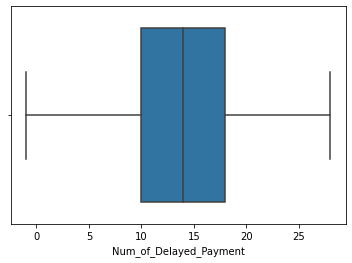

In [66]:
sns.boxplot(df['Num_of_Delayed_Payment'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59841 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     59841 non-null  object 
 1   Age                       59841 non-null  float64
 2   Annual_Income             59841 non-null  float64
 3   Monthly_Inhand_Salary     59841 non-null  float64
 4   Num_Bank_Accounts         59841 non-null  int64  
 5   Num_Credit_Card           59841 non-null  int64  
 6   Interest_Rate             59841 non-null  int64  
 7   Num_of_Loan               59841 non-null  float64
 8   Delay_from_due_date       59841 non-null  int64  
 9   Num_of_Delayed_Payment    59841 non-null  float64
 10  Num_Credit_Inquiries      58656 non-null  float64
 11  Credit_Mix                59841 non-null  object 
 12  Outstanding_Debt          59841 non-null  object 
 13  Credit_Utilization_Ratio  59841 non-null  float64
 14  Credit

In [68]:
df['Credit_Mix'] = df.Credit_Mix.str.replace('_','other')

In [69]:
df['Credit_Mix'].value_counts()

Standard    24491
Good        12165
other       12107
Bad         11078
Name: Credit_Mix, dtype: int64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59841 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     59841 non-null  object 
 1   Age                       59841 non-null  float64
 2   Annual_Income             59841 non-null  float64
 3   Monthly_Inhand_Salary     59841 non-null  float64
 4   Num_Bank_Accounts         59841 non-null  int64  
 5   Num_Credit_Card           59841 non-null  int64  
 6   Interest_Rate             59841 non-null  int64  
 7   Num_of_Loan               59841 non-null  float64
 8   Delay_from_due_date       59841 non-null  int64  
 9   Num_of_Delayed_Payment    59841 non-null  float64
 10  Num_Credit_Inquiries      58656 non-null  float64
 11  Credit_Mix                59841 non-null  object 
 12  Outstanding_Debt          59841 non-null  object 
 13  Credit_Utilization_Ratio  59841 non-null  float64
 14  Credit

In [71]:
df['Outstanding_Debt'] = df.Outstanding_Debt.str.replace('_','')

In [72]:
df['Outstanding_Debt'] = df.Outstanding_Debt.astype(float)

In [73]:
df['Outstanding_Debt'].value_counts()

460.46     18
1344.45    15
557.78     15
953.75     15
832.55     15
           ..
2585.96     1
2221.29     1
181.80      1
1680.63     1
3695.47     1
Name: Outstanding_Debt, Length: 11008, dtype: int64

<AxesSubplot:xlabel='Outstanding_Debt'>

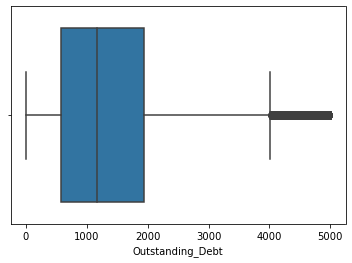

In [74]:
sns.boxplot(df['Outstanding_Debt'])

In [75]:
percentile25 = df['Outstanding_Debt'].quantile(0.25)
percentile75 = df['Outstanding_Debt'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [76]:
df = df.loc[(df['Outstanding_Debt'] > lower_limit) & (df['Outstanding_Debt'] < upper_limit)]

<AxesSubplot:xlabel='Outstanding_Debt'>

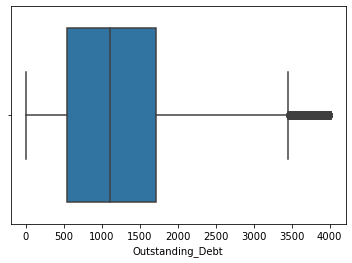

In [77]:
sns.boxplot(df['Outstanding_Debt'])

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56766 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     56766 non-null  object 
 1   Age                       56766 non-null  float64
 2   Annual_Income             56766 non-null  float64
 3   Monthly_Inhand_Salary     56766 non-null  float64
 4   Num_Bank_Accounts         56766 non-null  int64  
 5   Num_Credit_Card           56766 non-null  int64  
 6   Interest_Rate             56766 non-null  int64  
 7   Num_of_Loan               56766 non-null  float64
 8   Delay_from_due_date       56766 non-null  int64  
 9   Num_of_Delayed_Payment    56766 non-null  float64
 10  Num_Credit_Inquiries      55646 non-null  float64
 11  Credit_Mix                56766 non-null  object 
 12  Outstanding_Debt          56766 non-null  float64
 13  Credit_Utilization_Ratio  56766 non-null  float64
 14  Credit

In [79]:
df.Credit_Utilization_Ratio.value_counts()

26.822620    1
28.670682    1
35.828769    1
24.753986    1
37.720149    1
            ..
27.509178    1
36.861372    1
38.631991    1
38.189190    1
34.192463    1
Name: Credit_Utilization_Ratio, Length: 56766, dtype: int64

<AxesSubplot:xlabel='Credit_Utilization_Ratio'>

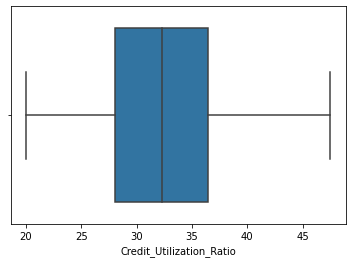

In [80]:
sns.boxplot(df['Credit_Utilization_Ratio'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56766 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     56766 non-null  object 
 1   Age                       56766 non-null  float64
 2   Annual_Income             56766 non-null  float64
 3   Monthly_Inhand_Salary     56766 non-null  float64
 4   Num_Bank_Accounts         56766 non-null  int64  
 5   Num_Credit_Card           56766 non-null  int64  
 6   Interest_Rate             56766 non-null  int64  
 7   Num_of_Loan               56766 non-null  float64
 8   Delay_from_due_date       56766 non-null  int64  
 9   Num_of_Delayed_Payment    56766 non-null  float64
 10  Num_Credit_Inquiries      55646 non-null  float64
 11  Credit_Mix                56766 non-null  object 
 12  Outstanding_Debt          56766 non-null  float64
 13  Credit_Utilization_Ratio  56766 non-null  float64
 14  Credit

In [82]:
df.Credit_History_Age.value_counts()

15 Years and 9 Months     278
19 Years and 5 Months     276
19 Years and 9 Months     269
15 Years and 11 Months    269
19 Years and 3 Months     263
                         ... 
0 Years and 4 Months       12
33 Years and 7 Months      10
33 Years and 8 Months       9
0 Years and 3 Months        7
0 Years and 2 Months        5
Name: Credit_History_Age, Length: 403, dtype: int64

In [83]:
df['Credit_History_Age'] = df['Credit_History_Age'].str[:2]

In [84]:
df['Credit_History_Age'] = df.Credit_History_Age.astype(float)

<AxesSubplot:xlabel='Credit_History_Age'>

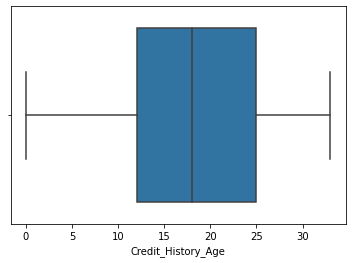

In [85]:
sns.boxplot(df['Credit_History_Age'])

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56766 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     56766 non-null  object 
 1   Age                       56766 non-null  float64
 2   Annual_Income             56766 non-null  float64
 3   Monthly_Inhand_Salary     56766 non-null  float64
 4   Num_Bank_Accounts         56766 non-null  int64  
 5   Num_Credit_Card           56766 non-null  int64  
 6   Interest_Rate             56766 non-null  int64  
 7   Num_of_Loan               56766 non-null  float64
 8   Delay_from_due_date       56766 non-null  int64  
 9   Num_of_Delayed_Payment    56766 non-null  float64
 10  Num_Credit_Inquiries      55646 non-null  float64
 11  Credit_Mix                56766 non-null  object 
 12  Outstanding_Debt          56766 non-null  float64
 13  Credit_Utilization_Ratio  56766 non-null  float64
 14  Credit

In [87]:
df['Payment_of_Min_Amount'].value_counts()

Yes    30680
No     19374
NM      6712
Name: Payment_of_Min_Amount, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56766 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     56766 non-null  object 
 1   Age                       56766 non-null  float64
 2   Annual_Income             56766 non-null  float64
 3   Monthly_Inhand_Salary     56766 non-null  float64
 4   Num_Bank_Accounts         56766 non-null  int64  
 5   Num_Credit_Card           56766 non-null  int64  
 6   Interest_Rate             56766 non-null  int64  
 7   Num_of_Loan               56766 non-null  float64
 8   Delay_from_due_date       56766 non-null  int64  
 9   Num_of_Delayed_Payment    56766 non-null  float64
 10  Num_Credit_Inquiries      55646 non-null  float64
 11  Credit_Mix                56766 non-null  object 
 12  Outstanding_Debt          56766 non-null  float64
 13  Credit_Utilization_Ratio  56766 non-null  float64
 14  Credit

In [89]:
df['Amount_invested_monthly'].value_counts()

__10000__             2403
0.0                     87
80.41529543900253        1
49.098960344812845       1
117.87205298070677       1
                      ... 
41.84261163243214        1
20.666185570302574       1
502.12614028657936       1
1029.911151056486        1
167.1638651610451        1
Name: Amount_invested_monthly, Length: 51791, dtype: int64

In [90]:
df['Amount_invested_monthly'] = df.Amount_invested_monthly.str.replace('_','')

In [91]:
df['Amount_invested_monthly']= df.Amount_invested_monthly.astype(float)

<AxesSubplot:xlabel='Amount_invested_monthly'>

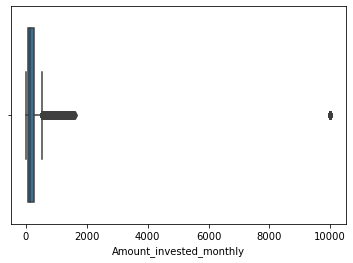

In [92]:
sns.boxplot(df['Amount_invested_monthly'])

In [93]:
percentile25 = df['Amount_invested_monthly'].quantile(0.25)
percentile75 = df['Amount_invested_monthly'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [94]:
df = df.loc[(df['Amount_invested_monthly'] > lower_limit) & (df['Amount_invested_monthly'] < upper_limit)]

<AxesSubplot:xlabel='Amount_invested_monthly'>

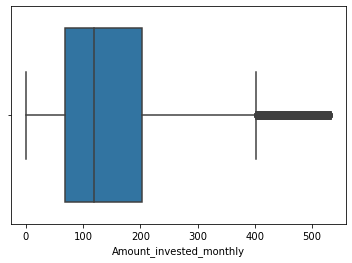

In [95]:
sns.boxplot(df['Amount_invested_monthly'])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48677 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     48677 non-null  object 
 1   Age                       48677 non-null  float64
 2   Annual_Income             48677 non-null  float64
 3   Monthly_Inhand_Salary     48677 non-null  float64
 4   Num_Bank_Accounts         48677 non-null  int64  
 5   Num_Credit_Card           48677 non-null  int64  
 6   Interest_Rate             48677 non-null  int64  
 7   Num_of_Loan               48677 non-null  float64
 8   Delay_from_due_date       48677 non-null  int64  
 9   Num_of_Delayed_Payment    48677 non-null  float64
 10  Num_Credit_Inquiries      47711 non-null  float64
 11  Credit_Mix                48677 non-null  object 
 12  Outstanding_Debt          48677 non-null  float64
 13  Credit_Utilization_Ratio  48677 non-null  float64
 14  Credit

In [97]:
df.Monthly_Balance.value_counts()

__-333333333333333333333333333__    6
312.49408867943663                  1
377.9043122334394                   1
300.09967283382906                  1
402.2867401121016                   1
                                   ..
527.5455321269197                   1
294.7522695909136                   1
610.0317553228854                   1
675.0901805796067                   1
393.6736955618808                   1
Name: Monthly_Balance, Length: 48595, dtype: int64

In [98]:
df['Monthly_Balance'] = df.Monthly_Balance.str.replace('_','')

In [99]:
df['Monthly_Balance']= df.Monthly_Balance.astype(float)

<AxesSubplot:xlabel='Monthly_Balance'>

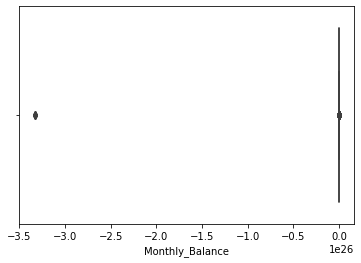

In [100]:
sns.boxplot(df['Monthly_Balance'])

In [101]:
percentile25 = df['Monthly_Balance'].quantile(0.25)
percentile75 = df['Monthly_Balance'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [102]:
df = df.loc[(df['Monthly_Balance'] > lower_limit) & (df['Monthly_Balance'] < upper_limit)]

<AxesSubplot:xlabel='Monthly_Balance'>

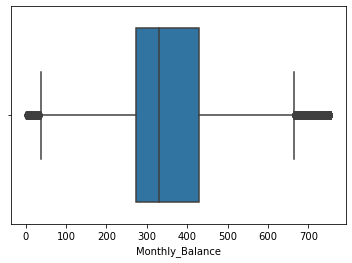

In [103]:
sns.boxplot(df['Monthly_Balance'])

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45113 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     45113 non-null  object 
 1   Age                       45113 non-null  float64
 2   Annual_Income             45113 non-null  float64
 3   Monthly_Inhand_Salary     45113 non-null  float64
 4   Num_Bank_Accounts         45113 non-null  int64  
 5   Num_Credit_Card           45113 non-null  int64  
 6   Interest_Rate             45113 non-null  int64  
 7   Num_of_Loan               45113 non-null  float64
 8   Delay_from_due_date       45113 non-null  int64  
 9   Num_of_Delayed_Payment    45113 non-null  float64
 10  Num_Credit_Inquiries      44239 non-null  float64
 11  Credit_Mix                45113 non-null  object 
 12  Outstanding_Debt          45113 non-null  float64
 13  Credit_Utilization_Ratio  45113 non-null  float64
 14  Credit

In [105]:
df['Credit_Score'].value_counts()

Standard    24916
Poor        13407
Good         6790
Name: Credit_Score, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45113 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     45113 non-null  object 
 1   Age                       45113 non-null  float64
 2   Annual_Income             45113 non-null  float64
 3   Monthly_Inhand_Salary     45113 non-null  float64
 4   Num_Bank_Accounts         45113 non-null  int64  
 5   Num_Credit_Card           45113 non-null  int64  
 6   Interest_Rate             45113 non-null  int64  
 7   Num_of_Loan               45113 non-null  float64
 8   Delay_from_due_date       45113 non-null  int64  
 9   Num_of_Delayed_Payment    45113 non-null  float64
 10  Num_Credit_Inquiries      44239 non-null  float64
 11  Credit_Mix                45113 non-null  object 
 12  Outstanding_Debt          45113 non-null  float64
 13  Credit_Utilization_Ratio  45113 non-null  float64
 14  Credit

In [107]:
df.Credit_Score.value_counts()

Standard    24916
Poor        13407
Good         6790
Name: Credit_Score, dtype: int64

In [111]:
#Saved cleaned data to a new csv file
df.to_csv('./data/cleaned_data.csv')